<a href="https://colab.research.google.com/github/skamranh/big-data-final/blob/main/Cardio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project - Juan Gallegos, Syed Kamran, Creed Abell


## 1. Problem Statement:

## 2. Objective:

## 3. Dataset Information (Description of each Column):
There are 3 types of input features:

Objective: factual information;
Examination: results of medical examination;
Subjective: information given by the patient.
Features:

- Age | Objective Feature | age | int (days)
- Height | Objective Feature | height | int (cm) |
- Weight | Objective Feature | weight | float (kg) |
- Gender | Objective Feature | gender | categorical code |
- Systolic blood pressure | Examination Feature | ap_hi | int |
- Diastolic blood pressure | Examination Feature | ap_lo | int |
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: - well above normal |
- Smoking | Subjective Feature | smoke | binary |
- Alcohol intake | Subjective Feature | alco | binary |
- Physical activity | Subjective Feature | active | binary |
- Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.
# Reference
- https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

## 4. Importing Libraries

In [1]:
!pip install pyspark
!pip install -q findspark

import pyspark
import findspark
findspark.init()
from pyspark.sql import SparkSession

import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns
import pyspark.pandas as ps

spark = SparkSession.builder.appName('wine').getOrCreate()

     |████████████████████████████████| 281.4 MB 27 kB/s 
     |████████████████████████████████| 198 kB 53.0 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=22c30a7a772e8a4d547cd8dd94f662426b76ea025d5d6a89b36c7bee414e504a
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


## 5. Loading Dataset(s)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# dataset_loc = "data/cardio.csv"
dataset_loc = "/content/drive/MyDrive/Dataset/cardio.csv"
cardio_spark = spark.read.csv(dataset_loc, header="true", inferSchema=True, sep=";")
cardio_pd = pd.read_csv(dataset_loc, sep=";")
cardio_ps = ps.read_csv(dataset_loc, sep=";")

## 6. Viewing the Head and Tail of the Dataset (first and last 5 rows)
- Starting from this section, at the end of each section, list 2-3 of your observations 

In [4]:
cardio_spark.show(5)

+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
| id|  age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|
+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|  0|18393|     2|   168|  62.0|  110|   80|          1|   1|    0|   0|     1|     0|
|  1|20228|     1|   156|  85.0|  140|   90|          3|   1|    0|   0|     1|     1|
|  2|18857|     1|   165|  64.0|  130|   70|          3|   1|    0|   0|     0|     1|
|  3|17623|     2|   169|  82.0|  150|  100|          1|   1|    0|   0|     1|     1|
|  4|17474|     1|   156|  56.0|  100|   60|          1|   1|    0|   0|     0|     0|
+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
only showing top 5 rows



In [13]:
cardio_spark.orderBy("id", ascending=False).show(5)

+-----+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|   id|  age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|
+-----+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|99999|20540|     1|   170|  72.0|  120|   80|          2|   1|    0|   0|     1|     0|
|99998|22431|     1|   163|  72.0|  135|   80|          1|   2|    0|   0|     0|     1|
|99996|19066|     2|   183| 105.0|  180|   90|          3|   1|    0|   1|     0|     1|
|99995|22601|     1|   158| 126.0|  140|   90|          2|   2|    0|   0|     1|     1|
|99993|19240|     2|   168|  76.0|  120|   80|          1|   1|    1|   0|     1|     0|
+-----+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
only showing top 5 rows



## 7. Examining the Shape of the Dataset

## 8. Checking the Data Types (dtype of each column)

In [ ]:
cardio_ps.info()

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int32  
 1   age          70000 non-null  int32  
 2   gender       70000 non-null  int32  
 3   height       70000 non-null  int32  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int32  
 6   ap_lo        70000 non-null  int32  
 7   cholesterol  70000 non-null  int32  
 8   gluc         70000 non-null  int32  
 9   smoke        70000 non-null  int32  
 10  alco         70000 non-null  int32  
 11  active       70000 non-null  int32  
 12  cardio       70000 non-null  int32  
dtypes: float64(1), int32(12)

In [ ]:
cardio_spark.printSchema()

root
 |-- id: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- height: integer (nullable = true)
 |-- weight: double (nullable = true)
 |-- ap_hi: integer (nullable = true)
 |-- ap_lo: integer (nullable = true)
 |-- cholesterol: integer (nullable = true)
 |-- gluc: integer (nullable = true)
 |-- smoke: integer (nullable = true)
 |-- alco: integer (nullable = true)
 |-- active: integer (nullable = true)
 |-- cardio: integer (nullable = true)



## 9. Viewing the Statistical Summary of the Dataset

In [ ]:
cardio_pd.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


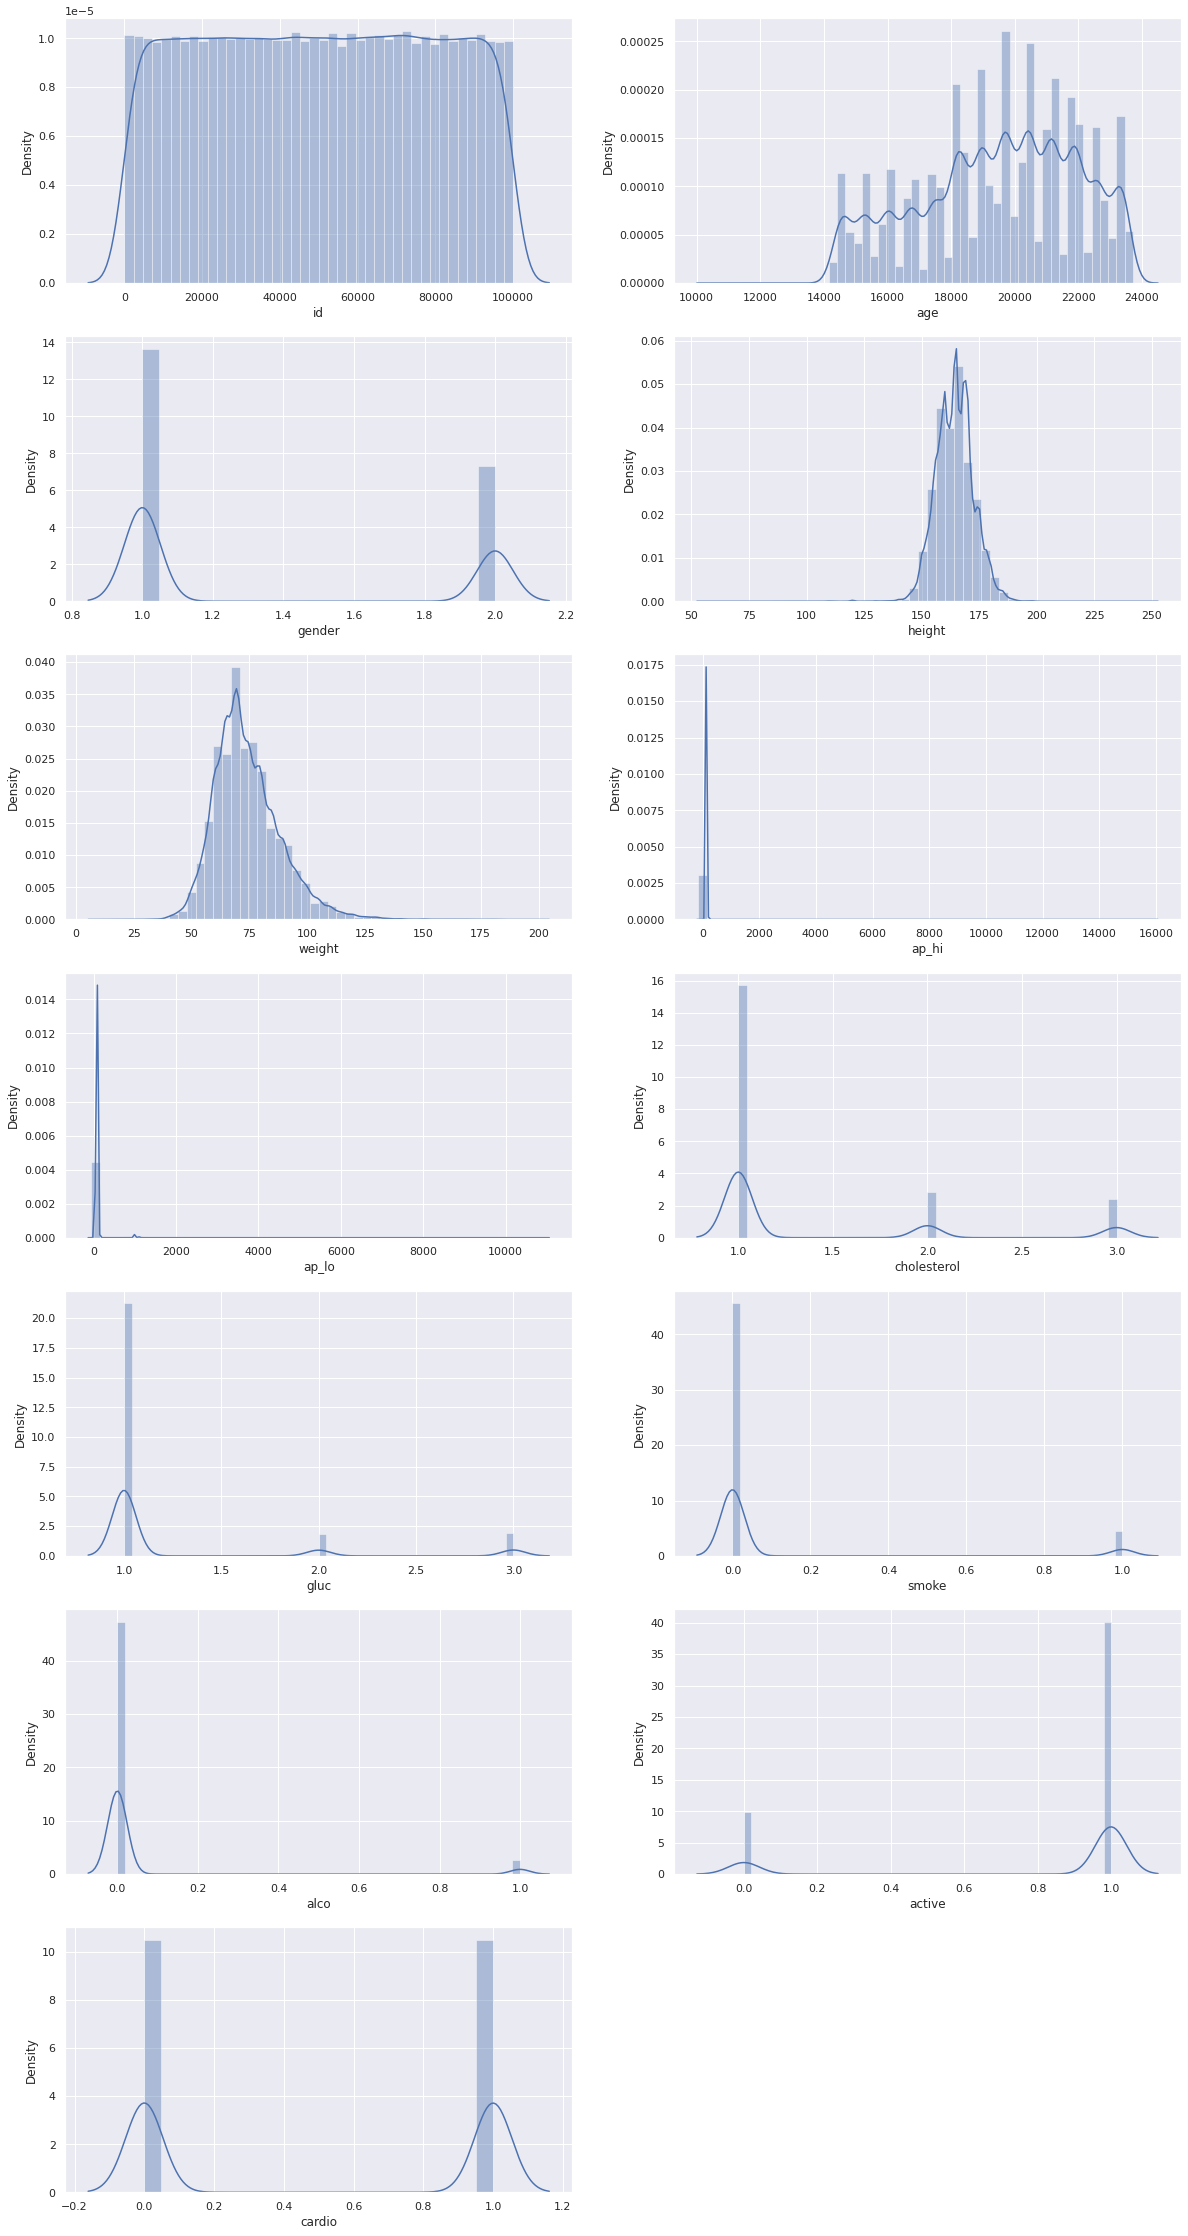

In [ ]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [20, 40]
for i, column in enumerate(cardio_pd.columns, 1):
    plt.subplot(7,2,i)
    sns.distplot(cardio_pd[column])

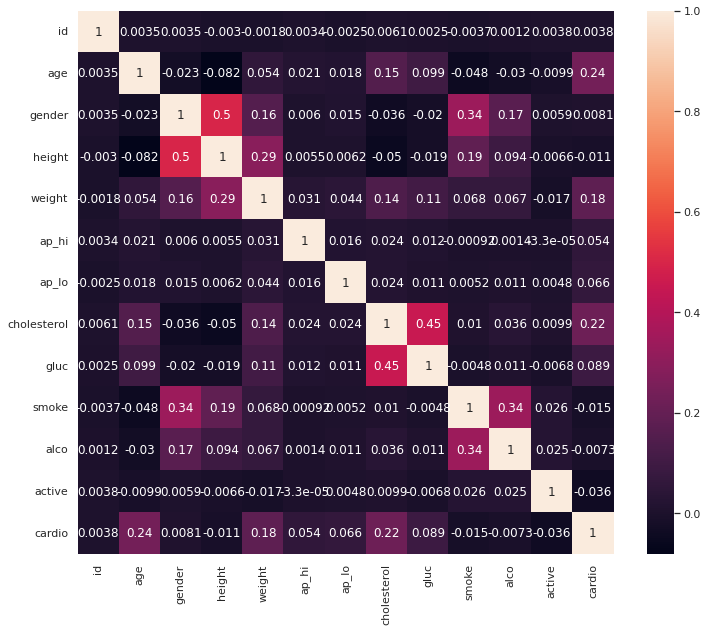

In [ ]:
plt.rcParams['figure.figsize'] = [12, 10]
sns.set(font_scale = 1)
sns.heatmap(cardio_pd.corr(), annot = True)

## 10. EDA


### Distribution Analysis(Need to update)
- cigPerDay is skewed for 0, since most of the subjects didn't smoke at all. This may produce a bias for non smokers(although smoking can increase heart related issues GK:)).
- BPmeds and PrevelantStroke data are too skewed for 0 and final model will get biased so it might be best to not include them in the model.
- Diabetes is skewed as well, but can be used(need to keep an eye on the model.)
- TenYearCHD is our target variable and is biased for 0, this is not good for the final model and F1,Precision must be used instead of accuracy.

# Logistic Regression(Without Feature Scaler)

In [ ]:
feature_columns = cardio_spark.columns[:-1] # here we omit the final column
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression

#Feature Selection
assembler = VectorAssembler(inputCols=feature_columns,outputCol="features")
cardio_spark2 = assembler.transform(cardio_spark)
# chd_spark2.show()

#Split
train, test = cardio_spark2.randomSplit([0.7, 0.3])

#model Definition
algo = LogisticRegression(
    featuresCol="features", 
    labelCol="cardio",
    maxIter=10)

#Training
model = algo.fit(train)

#Evaluation
training_summary = model.evaluate(train) 
evaluation_summary = model.evaluate(test)


print("Coefficients: " + str(model.coefficients))
print("Intercept: " + str(model.intercept))
print("Accuracy(Train): " + str(training_summary.accuracy))
print("Accuracy(Test): " + str(evaluation_summary.accuracy))

Coefficients: [2.446706813110737e-07,0.00015546653537195222,0.015902124245741323,-0.004745278397437271,0.01621496063162778,0.030353743699907284,0.0021765739471376203,0.5109153490735963,-0.0713192913172266,-0.03240597842985611,-0.04432638640376297,-0.19013954683545847]
Intercept: -7.9529943119185775
Accuracy(Train): 0.7142506995649421
Accuracy(Test): 0.714652345420845


In [ ]:
# predictions = model.transform(test)

In [ ]:
# trainingSummary = model.summary

# # Obtain the objective per iteration
# objectiveHistory = trainingSummary.objectiveHistory
# print("objectiveHistory:")
# for objective in objectiveHistory:
#     print(objective)

# # Obtain the receiver-operating characteristic as a dataframe and areaUnderROC.
# trainingSummary.roc.show()
# print("areaUnderROC: " + str(trainingSummary.areaUnderROC))

# # Set the model threshold to maximize F-Measure
# fMeasure = trainingSummary.fMeasureByThreshold
# maxFMeasure = fMeasure.groupBy().max('F-Measure').select('max(F-Measure)').head()
# bestThreshold = fMeasure.where(fMeasure['F-Measure'] == maxFMeasure['max(F-Measure)']) \
#     .select('threshold').head()['threshold']
# model.setThreshold(bestThreshold)



---
# 1. Logistic Regression(with Feature Scaling)


In [ ]:
from pyspark.ml.feature import StandardScaler
standardscaler = StandardScaler().setInputCol("features").setOutputCol("scaledFeatures")

# then, fit and transform dataset
cardio_spark2_scaled = standardscaler.fit(cardio_spark2).transform(cardio_spark2)
cardio_spark2_scaled.select("Features",'cardio','scaledFeatures').show(5, False)

+------------------------------------------------------------+------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|Features                                                    |cardio|scaledFeatures                                                                                                                                                                                       |
+------------------------------------------------------------+------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[0.0,18393.0,2.0,168.0,62.0,110.0,80.0,1.0,1.0,0.0,0.0,1.0] |0     |[0.0,7.454853610683736,4.194296458421633,20.462535232787754,4.306824669560291,0.7142327522756233,0.42446503941021474,1.47004702

In [ ]:
train_scaled, test_scaled = cardio_spark2_scaled.randomSplit([0.7, 0.3])

#model Definition
algo_scaled = LogisticRegression(
    featuresCol="scaledFeatures", 
    labelCol="cardio",
    maxIter=10)

#Training
model_scaled = algo_scaled.fit(train_scaled)

#Evaluation
training_scaled_summary = model_scaled.evaluate(train_scaled) 
evaluation_scaled_summary = model_scaled.evaluate(test_scaled)


print("Coefficients: " + str(model_scaled.coefficients))
print("Intercept: " + str(model_scaled.intercept))
print("Accuracy(Train): " + str(training_scaled_summary.accuracy))
print("Accuracy(Test): " + str(evaluation_scaled_summary.accuracy))

Coefficients: [0.003983375626754866,0.36993325727307896,-0.0023215379352022466,-0.047378876971076116,0.2074659830050949,5.651000485364325,0.44755016467123016,0.3497180901246249,-0.04079353863310293,-0.01173760183004815,-0.01918303116491728,-0.08164727881628622]
Intercept: -8.311755380241749
Accuracy(Train): 0.7203122134137643
Accuracy(Test): 0.7212746643734175


# 2. Decision Tree Classifier(With Scaled Features)

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

decision_tree_class = DecisionTreeClassifier(labelCol="cardio", featuresCol="scaledFeatures")

# let's fit the model
decision_tree_model = decision_tree_class.fit(train_scaled)

# let's predict the model on test and train set
decision_tree_prediction_train = decision_tree_model.transform(train_scaled)
decision_tree_prediction_test = decision_tree_model.transform(test_scaled)

decision_tree_accuracy_train = (MulticlassClassificationEvaluator(labelCol = "cardio", predictionCol = "prediction", metricName = "accuracy")).evaluate(decision_tree_prediction_train)
decision_tree_accuracy_test = (MulticlassClassificationEvaluator(labelCol = "cardio", predictionCol = "prediction", metricName = "accuracy")).evaluate(decision_tree_prediction_test)

print("Accuracy(Train): " + str(decision_tree_accuracy_train))
print("Accuracy(Test): " + str(decision_tree_accuracy_test))

Accuracy(Train): 0.7315412989871406
Accuracy(Test): 0.7328364626630357


# 3. GBT Classifier(With Scaled Features)

In [ ]:
from pyspark.ml.classification import GBTClassifier

gradient_boost_class = GBTClassifier(labelCol="cardio", featuresCol="scaledFeatures")

# let's fit the model
gradient_boost_model = gradient_boost_class.fit(train_scaled)

# let's predict the model on test and train set
gradient_boost_prediction_train = gradient_boost_model.transform(train_scaled)
gradient_boost_prediction_test = gradient_boost_model.transform(test_scaled)

gradient_boost_accuracy_train = (MulticlassClassificationEvaluator(labelCol = "cardio", predictionCol = "prediction", metricName = "accuracy")).evaluate(gradient_boost_prediction_train)
gradient_boost_accuracy_test = (MulticlassClassificationEvaluator(labelCol = "cardio", predictionCol = "prediction", metricName = "accuracy")).evaluate(gradient_boost_prediction_test)

# print("Coefficients: " + str(gradient_boost_model.coefficients))
# print("Intercept: " + str(gradient_boost_model.intercept))
print("Accuracy(Train): " + str(gradient_boost_accuracy_train))
print("Accuracy(Test): " + str(gradient_boost_accuracy_test))

Accuracy(Train): 0.7385518351708819
Accuracy(Test): 0.736562992690268


# 4. Random Forest(With Scaled Features)

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(labelCol="cardio", featuresCol="scaledFeatures", numTrees=40)

random_forest_model = random_forest_classifier.fit(train_scaled)

# let's predict the model on test and train set
random_forest_model_prediction_train = random_forest_model.transform(train_scaled)
random_forest_model_prediction_test = random_forest_model.transform(test_scaled)

random_forest_model_accuracy_train = (MulticlassClassificationEvaluator(labelCol = "cardio", predictionCol = "prediction", metricName = "accuracy")).evaluate(random_forest_model_prediction_train)
random_forest_model_accuracy_test = (MulticlassClassificationEvaluator(labelCol = "cardio", predictionCol = "prediction", metricName = "accuracy")).evaluate(random_forest_model_prediction_test)

# print("Coefficients: " + str(gradient_boost_model.coefficients))
# print("Intercept: " + str(gradient_boost_model.intercept))
print("Accuracy(Train): " + str(random_forest_model_accuracy_train))
print("Accuracy(Test): " + str(random_forest_model_accuracy_test))

Accuracy(Train): 0.7272208522692535
Accuracy(Test): 0.7305432134155081
